In [9]:
#project euler108
a = [0, 1, 2, 2]
u = [0, 1, 3, 3]

def isprime(x):
    i = 2
    while i * i <= x:
        if x % i == 0:
            return i
        i += 1
    return -1

def cntsol(n):
    w = isprime(n)
    if w < 0:
        a.append(2)
        u.append(3)
        return a[n]
    c, v = 0, n
    while v % w == 0:
        c += 1
        v //= w
    #print(w, c, v)
    a.append(a[v] + c * u[v]) 
    u.append(u[v] * (2 * c + 1))
    #print(len(a), a)
    #print(n, a[n], u[n])
    return a[n]

v = 4
while cntsol(v) <= 10 ** 3:
    #print(v, cntsol(v))
    v += 1
print(v)

180180


In [13]:
#project euler114
a = [1, 1, 1]
M = 50

def calc(j):
    r = a[j-1]  
    for k in range(3, j):
        if j-k-1 >= 0:
            r += a[j-k-1]
    a.append(r+1)
    
for i in range(3, M+1):
    calc(i)
print(a, a[M])

[1, 1, 1, 2, 4, 7, 11, 17, 27, 44, 72, 117, 189, 305, 493, 798, 1292, 2091, 3383, 5473, 8855, 14328, 23184, 37513, 60697, 98209, 158905, 257114, 416020, 673135, 1089155, 1762289, 2851443, 4613732, 7465176, 12078909, 19544085, 31622993, 51167077, 82790070, 133957148, 216747219, 350704367, 567451585, 918155951, 1485607536, 2403763488, 3889371025, 6293134513, 10182505537, 16475640049] 16475640049


In [14]:
#project euler104
from functools import lru_cache
from math import sqrt, ceil, log, log10, e, floor
import decimal

decimal.getcontext().prec = 120

@lru_cache(maxsize=None)
def fib4(n,mod=10 ** 9):
    if n <= 1:
        return n

    if n%2:
        m = (n+1)//2
        return (fib4(m, mod) ** 2 + fib4(m - 1, mod) ** 2) % mod
    else:
        m = n//2
        return ((2*fib4(m - 1, mod) + fib4(m, mod)) * fib4(m, mod)) % mod
    
def ispandigital(n):
    m = ''
    if type(n) != str:
        m = ''.join(sorted(str(n)))
    else:
        m = ''.join(sorted(n))
    return m == '123456789'

m = decimal.Decimal('0.4812118250596')
_m = decimal.Decimal(5).sqrt().ln()
#z = 1000 * m - log(_m)
m2 = 0.4812118250596

phi = (1 + sqrt(5)) / 2
_s5 = log(5) / 2
rd = decimal.Decimal(10) ** -15

print(rd)
def powphi(n):
    z = decimal.Decimal(n) * m - _m
    return z.exp()

def firstk(n):
    #k = z * decimal.Decimal(10 ** 9)
    return powphi(n).to_eng_string().replace('.', '')[:9]

def firstk2(n):
    _u = n * log(phi) - _s5
    v = _u * log10(e)
    v -= int(v)
    y = 10.0 ** v
    return int(y * (10 ** 8))

lphi = 0.4812118250596
lerr = 80
e100 = decimal.Decimal(1000).exp()
def sexp(b):
    #print(b)
    v = decimal.Decimal(1)
    while b >= 1000:
        v *= e100
        if v > 10 ** lerr:
            #z = v * (10 * 18)
            z = v
            z = z.to_eng_string()
            #print(z)
            j = z.find('E')
            v = decimal.Decimal(z[:j])
            #print(v)
        b -= 1000
        #print(b, v)
    k = decimal.Decimal(b).exp()
    v *= k
    return v

def firstk3(n):
    if n == 329468:
        print(n, n * lphi - _s5)
    k = decimal.Decimal(sexp(n * lphi - _s5))
    return k.to_eng_string().replace('.', '')[:9]

md = 10 ** 9
a, b = fib4(10 ** 4 - 1), fib4(10 ** 4)
i = 10 ** 4
dbg = 0
r = 0
_t = 329468
print(firstk3(_t), firstk2(_t), fib4(_t))
while dbg <= 10 ** 7:
    a, b = b, (a + b) % md
    
    if i+1 == 329468:
        print('#', b)
    
    if ispandigital(b):
        #print(i+1, b)
        if ispandigital(firstk2(i+1)):
            r = i+1
            print('#', i+1, b)
            break
    i += 1
    dbg += 1

if r == 0:
    print('No result...')
else:
    print(f'Result: {r} {firstk2(r)} {fib4(r)}')

1E-15
329468 158543.09285978007
245681738 245681739 352786941
# 352786941
# 329468 352786941
Result: 329468 245681739 352786941


In [15]:
#project euler125
i = 0
f = lambda x: (x * (x + 1) * (2 * x + 1)) // 6

#sqrs = [f(i) for i in range(10 ** 8)]
            
def generatesqrs(u, i):
    w = set()
    for j in range(i, 10 ** 5):
        u += j * j
        if u <= 10 ** 8:
            w.add(u)
        else:
            break
    return w

hsqrs = set()
for i in range(1, 10 ** 4 + 1):
    hsqrs |= generatesqrs(i * i, i + 1)
            
def check(x):
    u = int(x ** (1/2))
    if x == u * u:
        return False
    return (x in hsqrs)

r = 0
def generate(s, i, l):
    if i == l // 2:
        return [int(s)]
    
    a = []
    for k in range(10):
        if (i+1 == l // 2 and k > 0) or i+1 != l // 2:
            v = str(k)
            a += generate(v + s + v, i+1, l)
    return a

_w = []
print(check(5), check(55))
for k in range(1, 8, 2):
    a = []
    for j in range(10):
        a += generate(str(j), 0, k)
        a += generate(str(j) * 2, 0, k)
    #print(a)
    a = list(filter(check, a))
    if k <= 3:
        _w += list(filter(lambda x: x < 1000, a))
    #print(a, len(a))
    r += sum(a)
    
print(_w, sum(_w))
print(r)

True True
[5, 55, 77, 505, 313, 818, 434, 636, 545, 181, 595] 4164
2906969179


In [16]:
#project euler116
k = {'r' : 2, 'g': 3, 'b': 4}
w = {}
w[('r', 0)] = w[('r', 1)] = 0
w[('r', 2)] = 1
w[('r', 3)] = 2
for i in range(3):
    w[('g', i)] = 0
    w[('b', i)] = 0
w[('g', 3)] = 1
w[('b', 3)] = 0
print(w)

for i in range(4, 51):
    for u in ['r', 'g', 'b']:
        w[(u, i)] = w[(u, i-1)] + (w[(u, i-k[u])]+1)
        
v = 5
for u in ['r', 'g', 'b']:
    print(f'{u}, {v}:', w[(u, v)])
a = [w[('r', i)] + w[('g', i)] + w[('b', i)] for i in range(51)]
print(a)

{('r', 0): 0, ('r', 1): 0, ('r', 2): 1, ('r', 3): 2, ('g', 0): 0, ('b', 0): 0, ('g', 1): 0, ('b', 1): 0, ('g', 2): 0, ('b', 2): 0, ('g', 3): 1, ('b', 3): 0}
r, 5: 7
g, 5: 3
b, 5: 2
[0, 0, 1, 3, 7, 12, 20, 32, 51, 81, 128, 201, 316, 498, 786, 1242, 1966, 3118, 4954, 7884, 12566, 20057, 32056, 51295, 82170, 131759, 211464, 339660, 545971, 878174, 1413348, 2275881, 3666559, 5909565, 9528426, 15368753, 24796627, 40019286, 64603558, 104314047, 168468388, 272128696, 439645361, 710388043, 1148014254, 1855459863, 2999184924, 4848390628, 7838453749, 12673536613, 20492570929]


In [ ]:
#project euler123
def SoE(num):
    prime = [True for i in range(num+1)]
    p = 2
    while (p * p <= num):
 
        # If prime[p] is not
        # changed, then it is a prime
        if (prime[p] == True):
 
            # Updating all multiples of p
            for i in range(p * p, num+1, p):
                prime[i] = False
        p += 1
 
    return [p for p in range(2, len(prime)) if prime[p]]

def sqr(x, m):
    return (x * x) % m

def fexp(a, b, m):
    if b == 0:
        return 1
    if b == 1:
        return a 
    if b % 2:
        return (a * sqr(fexp(a, b // 2, m), m)) % m
    return sqr(fexp(a, b // 2, m), m)

def f(x, n):
    v = x * x
    a, b = fexp(x - 1, n, v), fexp(x + 1, n, v)
    return (a + b) % v
    
p = SoE(10 ** 6)
m = len(p)

print(m)
v = 0
c = 0
for i in range(0, m, 2):
    v = f(p[i], i+1)
    if v > 10 ** 10:
        c = i + 1
        break
    #print(f'#{p[i]}~{i+1}: {f(p[i], i+1)}, diff = {diff}')
print(c, v, len(str(v)))

78498
21035 10001595590 11


KeyboardInterrupt: 

In [ ]:
#project euler131
r = 0
p = 7
w, k = 1, 1

def isprime(x):
    i = 3
    while i * i <= x:
        if x % i == 0:
            return False
        i += 2
    return True and x % 2 != 0

while p < 10 ** 6:
    if isprime(p):
        r += 1
    w += 1
    k += 1
    a = k ** 3
    b = a + w ** 2
    p = (b ** 3 - a ** 3) // (a ** 2)
    #print(a, b, p)
print(r)

173


In [ ]:
#project euler124
def solve(m):
    def sieve_rad(n):
        s = [1 for j in range(n+1)]
        for i in range(2, n+1):
            if s[i] == 1:
                j = i
                k = i
                while j <= n:
                    s[j] *= i
                    j += k
        return s
    w = sieve_rad(m)[1:]
    w = [(i+1, w[i]) for i in range(len(w))]
    w = sorted(w, key=lambda x: x[1])
    print(w[10 ** 4 - 1])

m = 10 ** 5
solve(m)

(21417, 1947)


In [ ]:
#project euler129
#p = []
from math import lcm
def isprime(x):
    i = 3
    while i * i <= x:
        if x % i == 0:
            return i
        i += 2
    if x % 2 == 0:
        return 2
    return -1

w = {1: 1, 3: 3, 37: 3}

def calc(x):
    u = isprime(x)
    if u < 0:
        v = x // 2
        k = 0
        for i in range(len(str(x)), v+1):
            if (x - 1) % i != 0:
                continue
            r = '1' * i
            if int(r) % x == 0:
                v = int(r) // x
                k = len(r)
                if v > x:
                    w[v] = len(r)
                break
        if k == 0:
            return x - 1
        return k
    k = 1
    while x % u == 0:
        x //= u
        k *= u
    if x == 1:
        if u not in w:
            w[u] = calc(u)
        return w[u] * (k // u)
    if x not in w:
        #print('check!', x)
        w[x] = calc(x)
    if k not in w:
        #print('check!', k)
        w[k] = calc(k)
    return lcm(w[k], w[x])

#_k = 1
#for k in range(1, len(_s)):
    #if w[_s[k]] * 729 <= 10 ** 6:
        #if k > 1:
            #_k = k - 1
        #break
#print(_s[_k], w[_s[_k]] * 729)
#print(a, len(a))
k = 461
for u in [729, 243, 81, 27, 9, 3]:
    k = k * 3 - 200
    d = calc(k)
    while lcm(d, u) <= 10 ** 6:
        k += 2
        if k % 5 == 0:
            k += 2
        d = calc(k)
    print(k, k * u)
#print(r * 729, w[r] * 729)

1433 1044657
4127 1002861
12377 1002537
37061 1000647
111143 1000287
333341 1000023


In [ ]:
#project euler101
factorial = [0, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]
def calc(order, a):
    i = 0
    while i < order:
        b = [a[j] - a[j-1] for j in range(1, len(a))]
        a = b
        i += 1
    if a[0] % factorial[order] != 0:
        print('hey?', a[0], order)
    return a[0] // factorial[order]

def calcar(a, n):
    m = len(a) - 1
    s = 0
    for o in a:
        s += o * int(n ** m)
        m -= 1
    return s

def test(org, a):
    m = len(a)
    for i in range(1, m+1):
        v = calcar(a, i)
        #print('testing', i)
        if v != org[i-1]:
            print(f'error....{i} {org[i-1]} != {v}')

def solve(ar, m):
    r = 0
    for o in range(1, m+1):
        w = []
        a = ar.copy()[:o+1]
        k = a[0]
        m = len(a)
        for order in range(o, 0, -1):
            v = calc(order, a.copy()[:m])
            a = [a[i] - v * ((i+1) ** (order)) for i in range(len(a))]
            w.append(v)
            m -= 1
        s = sum(w)
        w.append(k - s)
        test(ar, w)
        v = calcar(w, len(w) + 1)
        r += v
        #print(w, v)
    return r
#k = a[0]
def f(x):
    s = 0
    for i in range(11):
        s += int((-1) ** i) * (x ** i)
    return s

a = [f(i) for i in range(1, 12)]
print(a)
#another test case
g = lambda x: x ** 3 + 2 * x + 1
u = [g(i) for i in range(1, 5)]

result = solve(a, 9)
print('result: ', result + 1)

[1, 683, 44287, 838861, 8138021, 51828151, 247165843, 954437177, 3138105961, 9090909091, 23775972551]
result:  37076114526


In [ ]:
#project euler127
from math import gcd
L = 120000

def isprime(x):
    i = 3
    while i * i <= x:
        if x % i == 0:
            return False
        i += 2
    return True and x % 2 != 0

def sieve_rad(n):
    s = [1 for j in range(n+1)]
    for i in range(2, n+1):
        if s[i] == 1:
            j = i
            k = i
            while j <= n:
                s[j] *= i
                j += k
    return s

p = sieve_rad(L)
frad = lambda x: p[x]

def sm_p_not_div(m, ith = 1):
    if m % 2 != 0:
        if ith == 1:
            return 2
        return sm_p_not_div(m * 2, ith - 1)

    p = 3
    while m % p == 0:
        p += 2
        while not isprime(p):
            p += 2

    if ith == 1:
        return p
    return sm_p_not_div(m * p, ith - 1)

cnt = 0
r = 0
progress = 0
L = 120000
t = []
h = []

#test for a = 1 seperately
allc = [k for k in range(1, L) if frad(k) * sm_p_not_div(k) < k]
for c in allc:
    w = frad(c - 1) * frad(c)
    if w < c:
        cnt += 1
        r += c

#test for case a >= 2
allc = [k for k in allc if frad(k) * sm_p_not_div(k) * sm_p_not_div(k, 2) < k]
print(len(allc))
for c in allc:
    j, _j = 1, 2
    if c % 2 == 0:
        j, _j = 2, 3
    for a in range(_j, c // 2 + 1, j):
        if a != c - a and gcd(a, c) == 1:
            b = c - a
            if gcd(b, c) != 1 or gcd(a, b) != 1:
                continue
            v = frad(a) * frad(b) * frad(c)
            if v < c:
                #t.append((a, b, c))
                #h.append(c)
                #print(f'{a} {b} {c}: {v}')
                cnt += 1
                r += c
    progress += 1
    if progress % 1000 == 0:
        print(progress)
#print(t)
#print(sorted(h))
print('#', cnt, r)

9531
1000
2000
3000
4000
5000
6000
7000
8000
9000
# 456 18407904


In [ ]:
#project euler122
from math import log2, floor

a = [0, 0, 1, 2]

def isprime(x):
    i = 3
    while i * i <= x:
        if x % i == 0:
            return i
        i += 2
    if x % 2 == 0:
        return 2
    return -1

def ispot(n):
    v = int(floor(log2(n)))
    return v

def  countSetBits(n):
    count = 0
    while (n):
        count += n & 1
        n >>= 1
    return count

for i in range(4, 201):
    if i % 2 == 0:
        a.append(a[i // 2] + 1)
        continue
        
    v = isprime(i)
    if v < 0:
        k = ispot(i)
        n = i - 2 ** k
        a.append(a[2 ** k] + countSetBits(n))
    else:
        k = i - v
        a.append(a[k] + 1)

print(a[7], a[11], a[15], a[19], a[23])
print(a[:10])
print(sum(a))

4 5 5 6 7
[0, 0, 1, 2, 2, 3, 3, 4, 3, 4]
1659


In [ ]:
#project euler119
def sdg(x):
    return sum([int(o) for o in str(x)])

w = []
for i in range(2,71):
    for j in range(2, 21):
        a = i ** j
        v = sdg(a)
        if v == i:
            w.append(a)
            
w = sorted(w)
print(len(w), w[29])

33 248155780267521


In [ ]:
#project euler112
incr = [[], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
decr = [[], [1], [2], [3], [4], [5], [6], [7], [8], [9]]

nb = 9 #count for 0
total = 10

def calc(k):
    for i in range(10):
        u = []
        for j in range(i, 10):
            u += [v * 10 + i for v in decr[j]]
        decr[i] = u
    
    global incr
    _u = []
    for i in range(1, 10):
        u = []
        for j in range(1, i+1):
            u += [v * 10 + i for v in incr[j]]
        _u.append(u)
    incr = [[]] + _u
       
_t = 0
w = 0
for i in range(2, 8):
    total = 10 ** i
    calc(i)
    u = sum(incr, [])
    v = sum(decr, [])
    k = set(u).union(set(v))
    if i >= 5:
        v = 0
        j = 0
        u = sorted(list(k))
        for o in u:
            nb += 1
            #print(nb, o, nb / o)
            if nb / o <= 0.01:
                w = u[j - 1]
                _t = o
                v = 1
                print(w, u[j], o)
                break
            j += 1
        if v:
            break
    else:
        nb += len(k)

print((nb - 1) / w ,nb / _t)
u = nb - 1
for i in range(w, _t):
    if u / i == 0.01:
        print(u, i, u / i)
        break

1579999 1588888 1588888
0.01004431015462668 0.009988746846851382
15870 1587000 0.01


In [ ]:
#project euler102
from math import acos, pi
def conv(x):
    x = [int(o) for o in x.split(',')]
    return [x[i:i+2] for i in range(0, 6, 2)]

class vect:
    def __init__(self, A, B):
        self.a = B[0] - A[0]
        self.b = B[1] - A[1]
        
        self.mag = (self.a * self.a + self.b * self.b) ** (1/2)
        
        self.k0 = self.k1 = self.k2 = 0
        if A[0] != B[0]:
            self.k1 = 1
            self.k0 = (A[1] - B[1]) / self.a
            self.k2 = -(self.k0 * A[0] + self.k1 * A[1])
        else:
            self.k0 = 1
            self.k1 = 0
            self.k2 = A[0]
        
    def same_dir(self, p):
        u = abs(self.a * p.a + self.b * p.b)
        v = self.mag * p.mag
        return u == v
    
def angleof(v1, v2):
    u = v1.a * v2.a + v1.b * v2.b
    v = v1.mag * v2.mag
    return acos(u / v)

class point:
    def __init__(self, v):
        self.a = v[0]
        self.b = v[1]

def fs(p1, p2, p3):
    return (p1.a - p3.a) * (p2.b - p3.b) - (p2.a - p3.a) * (p1.b - p3.b)

def testing(p, p1, p2, p3):
    d1 = fs(p, p1, p2)
    d2 = fs(p, p2, p3)
    d3 = fs(p, p3, p1)
    
    hneg = d1 < 0 or d2 < 0 or d3 < 0
    hpos = d1 > 0 or d2 > 0 or d3 > 0
    return not (hneg and hpos)

with open('test.txt', 'r') as f:
    a = f.read().split()
    a = list(map(conv, a))
    cnt = 0
    for o in a:
        A = point(o[0])
        B = point(o[1])
        C = point(o[2])
        O = point((0, 0))
            
        #test OA with BC
        if testing(O, A, B, C):
            cnt += 1
    print(cnt)

228


In [ ]:
#project euler103
from itertools import combinations
def sastify(p):
    return sum(p[:2]) > p[6] and sum(p[:3]) > sum(p[5:]) and sum(p[:4]) > sum(p[4:])

def calcsum(pers, a):
    sums = []
    for o in pers:
        s = 0
        for j in o:
            s += a[j]
        sums.append(s)
    return sums
        
u = [i for i in range(7)]
w = {}
for j in range(2, 7):
    w[j] = list(combinations(u, j))

def sastify2(p):
    for j in range(2, 7):
        s = calcsum(w[j], p)
        k = set(s)
        if len(k) < len(s):
            return False
    return True

a = []
for w0 in range(16, 21):
    for k in range(-25, 1):
        w6 = 50 + k
        for j in range(w0 + 1, 33):
            w1 = j
            for j2 in range(1, 8):
                w2 = w1 + j2
                for j3 in range(w2 + 1, 40):
                    w3 = j3
                    for j4 in range(w3 + 1, 42):
                        w4 = j4
                        for j5 in range(max(25, w4), w6):
                            w5 = j5
                            m = [w0, w1, w2, w3, w4, w5, w6]
                            if sastify(m) and sastify2(m):
                                a.append(m)
#print(a)
v = min(a, key=sum)
print(v, ''.join([str(o) for o in v]))


[20, 31, 38, 39, 40, 42, 45] 20313839404245


In [ ]:
#project euler105
from itertools import combinations
def sastify(p):
    m = len(p)
    i, j = 2, m - 1
    while i <= j:
        if sum(p[:i]) <= sum(p[j:]):
            return False
        i += 1
        j -= 1
    return True

def calcsum(pers, a):
    #print(pers, a)
    sums = []
    for o in pers:
        s = 0
        for j in o:
            s += a[j]
        sums.append(s)
    return sums
        
u = [i for i in range(12)]
w = {}
for L in range(7, 13):
    w[L] = {}
    for j in range(2, L // 2 + 1):
        w[L][j] = list(combinations(u[:L], j))

def sastify2(p):
    m = len(p)
    for j in range(2, m // 2 + 1):
        s = calcsum(w[m][j], p)
        k = set(s)
        if len(k) < len(s):
            return False
    return True

ss = 0
with open('test.txt', 'r') as f:
    a = f.read().split()
    a = [list(map(int, o.split(','))) for o in a]

    for s in a:
        if len(set(s)) < len(s):
            continue
        s = sorted(s)
        if sastify(s) and sastify2(s):
            ss += sum(s)
    print(ss)

73702


In [ ]:
#project euler120
def sieve_phi(n):
    a = [i for i in range(n + 1)]
    for j in range(2, len(a)):
        if a[j] == j:
            k = j
            u = j + k
            while u <= n:
                a[u] = (a[u] // k) * (k - 1)
                u += k
            a[j] = j - 1
    return a

phi_table = sieve_phi(10 ** 6)
sqr = lambda x, m: (x * x) % m

def mpow(a, b, m):
    if b == 0:
        return 1
    if b == 1:
        return a
    if b % 2:
        return (a * sqr(mpow(a, b // 2, m), m)) % m
    return sqr(mpow(a, b // 2, m), m)

print(phi_table[12], mpow(3, 5, 7))
s = 0
for n in range(3, 1001):
    b = []
    v = phi_table[n * n]
    u = n * n
    for j in range(1, v, 2):
        w = 2 * n * j
        b.append(w % u)
    s += max(b)
    #print(n, b, max(b))
print(s)

4 5
333082500


In [ ]:
#project euler145
from functools import lru_cache

def cdiv10(x):
    return x % 10 == 0

def test(x):
    s = str(x)
    w = '02468'
    for o in w:
        if o in s:
            return False
    return True

def sr(x):
    s = reversed(str(x))
    s = int(''.join([o for o in s]))
    return x + s

#f(k, nlz, contained, addone)
#k: number of digits
#nlz: not leading zero (bool)
#contained: if a + b < 10 (bool)
#addone: if need to add one to obtain all odd digits number (bool)
w = {
    (2, 0, 1, 1): 0, (3, 0, 1, 1): 0,
    (2, 0, 1, 0): 10, (3, 0, 1, 0): 0,
    (2, 1, 1, 1): 0, (3, 1, 1, 1): 0,
    (2, 1, 0, 0): 0, (3, 1, 0, 0): 100,
    (2, 1, 1, 0): 20,(3, 1, 1, 0): 0
}

def f(k):
    w[(k, 0, 1, 1)] = 9 * w[(k - 2, 1, 0, 0)]
    w[(k, 0, 1, 0)] = 10 * (w[(k - 2, 0, 1, 0)] + w[(k - 2, 1, 1, 0)])
    w[(k, 1, 1, 1)] = 16 * w[(k - 2, 1, 0, 0)]
    w[(k, 1, 0, 0)] = 20 * (w[(k - 2, 0, 1, 1)] + w[(k - 2, 1, 1, 1)])
    w[(k, 1, 1, 0)] = 20 * (w[(k - 2, 0, 1, 0)] + w[(k - 2, 1, 1, 0)])

#for debug purpose
lsr = lambda x: len(str(sr(x)))
lstr = lambda x: len(str(x))
print(sr(26170), test(sr(1100)))

#main
print('--------------------')
total = 0
for k in range(4, 10):
    f(k) #calculate all the w
    #print('?', w[(k, 0, 1, 0)], w[(k, 0, 1, 1)], w[(k, 1, 1, 1)])
    u, v = w[(k, 1, 1, 0)], w[(k, 1, 0, 0)]
    h = u + v
    total += h
    #print('t:', k, u, v, 'total:', h)
print('answer:', total + 120)

33332 True
--------------------
answer: 608720


In [ ]:
#project euler134
def isprime(x):
    v = int(x ** (1/2))
    for i in range(3, v+1, 2):
        if x % i == 0:
            return False
    return True

def egcd(a, b):
    old_r, r = a, b
    old_s, s = 1, 0
    old_t, t = 0, 1

    while r != 0:
        q = old_r // r
        old_r, r = r, old_r - q * r
        old_s, s = s, old_s - q * s
        old_t, t = t, old_t - q * t

    return old_r, old_s, old_t

a = 5
ss = 0
while a <= 10 ** 6:
    b = a + 2
    while not isprime(b):
        b += 2

    k = len(str(a))
    k = int('1' + '0' * k)

    w, u, v = egcd(b, k)
    #print('~', v)
    q = 0
    if v < 0:
        q = ((-v) * a) % b
    elif v > 0:
        w = b - a
        q = (v * w) % b
    s = a + k * q
    ss += s
    a = b

print(ss)
    

18613426663617118


In [ ]:
#project euler115
a = [1] * 50
M = 50

def calc(j):
    r = a[j-1]  
    for k in range(M, j):
        if j-k-1 >= 0:
            r += a[j-k-1]
    a.append(r+1)
    
j = M
while a[-1] < 10 ** 6:
    calc(j)
    j += 1

print(a, a[-1], len(a) - 1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 7, 11, 16, 22, 29, 37, 46, 56, 67, 79, 92, 106, 121, 137, 154, 172, 191, 211, 232, 254, 277, 301, 326, 352, 379, 407, 436, 466, 497, 529, 562, 596, 631, 667, 704, 742, 781, 821, 862, 904, 947, 991, 1036, 1082, 1129, 1177, 1226, 1276, 1327, 1380, 1437, 1501, 1576, 1667, 1780, 1922, 2101, 2326, 2607, 2955, 3382, 3901, 4526, 5272, 6155, 7192, 8401, 9801, 11412, 13255, 15352, 17726, 20401, 23402, 26755, 30487, 34626, 39201, 44242, 49780, 55847, 62476, 69701, 77557, 86080, 95307, 105276, 116026, 127597, 140030, 153367, 167651, 182926, 199237, 216630, 235152, 254851, 275776, 297977, 321505, 346413, 372758, 400604, 430026, 461115, 493984, 528775, 565667, 604885, 646710, 691490, 739652, 791715, 848304, 910165, 978181, 1053389] 1053389 168


In [ ]:
#project euler122
pathes = [[1, 2]]
L = 200

def check(alld, v):
    for v in range(1, v + 1):
        if v not in alld:
            return False
    return True

d = {1: 0, 2: 1}
dlv = 2
for i in range(L // 10):
    w = []
    for o in pathes:
        k = o[-1]
        for j in o:
            if j + k in d and d[j + k] < dlv:
                continue
            h = o.copy() + [j + k]
            w.append(h)
            if j + k not in d:
                d[j + k] = dlv
            else:
                d[j + k] = min(d[j + k], dlv)
    dlv += 1
    pathes = w

    if check(d, L):
        break

print(d[15])
if check(d, L):
    s = 0
    for v in range(1, L+1):
        #print(v, d[v])
        s += d[v]
    print(s)
else:
    print('error?')

5
1582


In [ ]:
#project euler 135 & 136
from math import sqrt

def divs(x):
    i = 2
    r = []
    while i * i <= x:
        if x % i == 0:
            v = x // i

            if v == i:
                r.append(v)
            else:
                r += [i, v]
        i += 1
    return sorted(r) + [x]

def issqr(n):
    v = int(sqrt(n))
    return n == v * v

L = 1 * 10 ** 2
total = 0
for n in range(3, L+1):
    if n % 4 in [1, 2] or n % 16 == 8:
        continue
    h = int(sqrt(n // 3))
    w = divs(n)

    if len(w) == 1:
        total += 1 #comment this for problem 135
        continue
    
    """
    comment this for problem 136
    if len(w) < 10:
        continue
    """
    c = 0
    if n % 4 == 3 or issqr(n // 4):
        c = 1
    elif n % 16 in [0, 4, 12]:
        c = 1

    for j in w:
        if j < h:
            continue
        k = j + n // j
        if k % 4 != 0:
            continue
        d = k // 4 
        if d < j:
            c += 1
            if c == 2:
                break

    if c == 1:
        total += 1
    #print(n, len(a), a)
print(total)

13


In [ ]:
#project euler 117
a = [1, 1, 2, 4]
for j in range(4, 51):
    a.append(a[-1]+a[-2]+a[-3]+a[-4])
print(a[5], a[50])

15 100808458960497


In [ ]:
#project euler 106
from itertools import combinations
m = 2
n = 8
w = [i for i in range(n)]

#check if disjoint
isdj = lambda x: len(set(x[0]).intersection(set(x[1]))) == 0

total = 0
while 2 * m <= n:
    #subset with size m
    a = combinations(w, m)

    #pair subset size m 
    a = list(combinations(list(a), 2))

    #remove all non disjoint sets pair
    a = [o for o in a if isdj(o)]
    #print(list(a))

    #count number of candidates for equality test
    s = 0
    for o in a:
        v1, v2 = sorted(o[0]), sorted(o[1])

        check = True
        for j in range(1, m):
            if v1[j] > v2[j]:
                check = False
                break
        if not check:
            s += 1
    #print(n, m, s)

    total += s
    m += 1
print('#', total)

# 231


In [ ]:
#project euler 107
inf = 0

def t(o):
    if o == '-':
        return inf
    return int(o)

def test():
    a = {
        9: [29, 3, 7, 13, 2, 10],
        37: [29],
        29: [9, 12],
        2: [9],
        3: [9],
        7: [9],
        10: [9],
        13: [9, 39],
        39: [13]
    }

    print(check(a, 2, 12))

def check(d, ce, e1, vs = set(), db = False):
    if ce == e1:
        return True

    for e in d[ce]:
        if e not in vs:
            vs.add(e)
            if db:
                print('~', ce, e1, vs)
            if check(d, e, e1, vs, db):
                return True
    return False

def perf(d, e0, e1):
    if e0 not in d:
        d[e0] = [e1]
    elif e1 not in d[e0]:
        d[e0].append(e1)
    else:
        print('??????')

def krusal(graph):
    m = len(graph)
    print('num of vertexs: ', m)

    elist = []
    #make list of edges instead of adjacency matrix
    for i in range(m - 1):
        for j in range(i+1, m):
            if graph[i][j] != inf:
                elist.append((i, j, graph[i][j]))

    #sorted based on weight
    elist = sorted(elist, key = lambda x: x[2])
    print(len(elist))
    #added edges
    aedges = {}
    wt = 0
    k = 0
    w = []
    for edge in elist:
        e0, e1 = edge[0], edge[1]
        c0, c1 = False, False
        if e0 in aedges:
            c0 = check(aedges, e0, e1, set([e0]))
            if c0:
                continue

        perf(aedges, e0, e1)
        perf(aedges, e1, e0)

        w.append(edge)
        k += 1
        wt += edge[2]

        if k == m - 1:
            return wt

    #print('k', k)
    #print(f'wt: {wt}')
    return -1

test()
with open('test.txt', 'r') as f:
    a = f.read().split('\n')
    a = [[t(m) for m in o.split(',')] for o in a]

    #calc original sum
    s = 0
    m = len(a)
    for i in range(m - 1):
        for j in range(i + 1, m):
            s += a[i][j]
    v = krusal(a)
    print(s, s - v, v)

True
num of vertexs:  40
513
261832 259679 2153


In [ ]:
#project euler113
incr = [0] + [1] * 9
decr = [0] + [1] * 9

nb = 9 #count for 0
total = 10

def calc(k):
    for i in range(10):
        u = 0
        for j in range(i, 10):
            u += decr[j]
        decr[i] = u
    
    global incr
    _u = []
    for i in range(1, 10):
        u = 0
        for j in range(1, i+1):
            u += incr[j]
        _u.append(u)
    incr = [0] + _u
       
_t = 0
w = 0
L = 100
for i in range(2, L+1):
    #total = 10 ** i
    calc(i)
    u, v = sum(incr), sum(decr)
    k = u + v - 9
    #print(u, v, k)
    nb += k

print(nb)

51161058134250


In [ ]:
#project euler110
import heapq as hq

def SoE(num):
    prime = [True for i in range(num+1)]
    p = 2
    while (p * p <= num):
 
        # If prime[p] is not
        # changed, then it is a prime
        if (prime[p] == True):
 
            # Updating all multiples of p
            for i in range(p * p, num+1, p):
                prime[i] = False
        p += 1
 
    return [p for p in range(2, len(prime)) if prime[p]]

primes = SoE(1000)
m = len(primes)

def create_v(t):
    v, k = 1, 0
    for j in t:
        v *= primes[k] ** j
        k += 1
    return v

def tau(t):
    w = 1
    for o in t:
        w *= (2 * o + 1)
    return (w + 1) // 2

L = 4000000
print(create_v((2, 2, 1, 1, 1, 1)))
h = []
db, maxdb = 0, 10 ** 5
hq.heappush(h, (2, (1,)))
while db <= maxdb:
    v = hq.heappop(h)
    w, u = v[1], 1000
    #print(v)
    for i in range(len(w)):
        if w[i] < u:
            k = w[:i] + (w[i] + 1, ) + w[i+1:]
            _k = (create_v(k), k)
            if _k not in h:
                hq.heappush(h, _k)
            u = w[i]
    k1 = w + (1, )
    hq.heappush(h, (create_v(k1), k1))
    #print(h)
    db += 1

    if tau(v[1]) >= L:
        print(f'result: {v}')
        break
print('End of program')

180180
result: (9350130049860600, (3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1))
End of program


In [ ]:
#project euler111
from math import log10
def isprime(x):
    i = 3
    while i * i <= x:
        if x % i == 0:
            return False
        i += 2
    return True and x % 2 != 0

def repls(s, i, c):
    return s[:i] + c + s[i+1:]

def count_sol(m, d, e = 1):
    c, s = 0, 0
    u = str(d)
    if d == 0:
        v = u * (m - 2)
        for j in range(1, 10, 2):
            for i in range(1, 10):
                k = int(str(i) + v + str(j))

                if isprime(k):
                    c += 1
                    s += k
    elif e <= 2:
        if e == 1:
            v = u * (m - 1)
            if d % 2 == 0:
                for j in [1, 3, 7, 9]:
                    k = int(v + str(j))

                    if isprime(k):
                        c += 1
                        s += k
                        #print(k)
            else:
                for j in range(10):
                    for i in range(m):
                        if j == 0 and i == 0:
                            continue
                        if j % 2 == 0 and i == m - 1:
                            continue
                        if j == d:
                            continue

                        k = int(v[:i] + str(j) + v[i:])
                        #print(k)

                        if isprime(k):
                            c += 1
                            s += k
        else:
            v = u * m
            for i in range(100):
                w = str(i)
                if i < 10:
                    w = '0' + w
                v0, v1 = w[0], w[1]

                for j1 in range(m - 1):
                    for j2 in range(j1 + 1, m):
                        if d % 2 == 0 and j2 < m - 1:
                            continue
                        if v0 == '0' and j1 == 0:
                            break
                        if (i % 2 == 0 or i % 5 == 0) and j2 == m - 1:
                            continue
                        if v0 == u or v1 == u:
                            continue
                        
                        k = repls(v, j1, v0)
                        k = repls(k, j2, v1)
                        k = int(k)
                        #print(k)
                        if isprime(k):
                            c += 1
                            s += k
                            #print(k)

    return c, s
#count_sol(8, 4, 2)
tc, ts = 0, 0
L = 10
for d in range(10):
    a, b = 0, 0
    e = 1
    while a == 0:
        a, b = count_sol(L, d, e)
        e += 1

        if e == 3:
            break
    tc += a
    ts += b
    #print(d, a, b, e - 1)
print(f'result for L = {L} is tc = {tc}, ts = {ts}')
    

result for L = 10 is tc = 117, ts = 612407567715


In [ ]:
#project euler118
from itertools import permutations as permu

L = 9

f = lambda x : int(''.join(x))
primes =  [2, 3, 5, 7]

def isprime(x):
    j = 3
    while j * j <= x:
        if x % j == 0:
            return False
        j += 2
    
    return True and x % 2 != 0

for o in [2, 5, 7]:
    w = [i for i in range(1, L+1)]
    w.remove(o)

    h = [1, 3, 7, 9]
    if o == 7:
        h.remove(7)
    for _h in h:
        q = w.copy()
        q.remove(_h)
        a = list(permu(q))
        a = [10 * f((str(v) for v in o)) + _h for o in a]

        for v in a:
            if isprime(v):
                primes.append(v)
#print(primes, len(primes))

for dle in range(2, 8):
    for _h in [1, 3, 7, 9]:
        w = [i for i in range(1, L+1)]
        w.remove(_h)

        a = list(permu(w, dle - 1))
        a = [10 * f((str(v) for v in o)) + _h for o in a]

        for v in a:
            if isprime(v):
                primes.append(v)

primes = sorted(primes)
m = len(primes)
#print(len(primes), sorted(primes)[:100])
allsets = {
    ('2',): 1}

for j in range(1, m):
    w = sorted(str(primes[j]))

    skeys = list(allsets.keys())
    for s in skeys:
        if set(s).isdisjoint(set(w)):
            k = tuple(sorted(w + list(s)))

            if k not in allsets:
                allsets[k] = allsets[s]
            else:
                allsets[k] += allsets[s]
    v = tuple(w)
    if v not in allsets:
        allsets[v] = 1
    else:
        allsets[v] += 1

a = tuple([str(i) for i in range(1, 10)])
print(allsets[a])

44680


In [ ]:
#project euler130
from math import lcm
def isprime(x):
    i = 3
    while i * i <= x:
        if x % i == 0:
            return i
        i += 2
    if x % 2 == 0:
        return 2
    return -1

w = {1: 1, 3: 3, 37: 3}

def calc(x):
    u = isprime(x)
    if u < 0:
        v = x // 2
        k = 0
        for i in range(len(str(x)), v+1):
            if (x - 1) % i != 0:
                continue
            r = '1' * i
            if int(r) % x == 0:
                v = int(r) // x
                k = len(r)
                if v > x:
                    w[v] = len(r)
                break
        if k == 0:
            return x - 1
        return k
    k = 1
    while x % u == 0:
        x //= u
        k *= u
    if x == 1:
        if u not in w:
            w[u] = calc(u)
        return w[u] * (k // u)
    if x not in w:
        #print('check!', x)
        w[x] = calc(x)
    if k not in w:
        #print('check!', k)
        w[k] = calc(k)
    return lcm(w[k], w[x])

a = []
for j in range(3, 5 * 10 ** 4, 2):
    if j % 5 == 0:
        continue
    v = calc(j)
    if isprime(j) > 0:
        if (j - 1) % v == 0:
            a.append(j)
print(a, len(a), sum(a[:25]))


[91, 259, 451, 481, 703, 1729, 2821, 2981, 3367, 4141, 4187, 5461, 6533, 6541, 6601, 7471, 7777, 8149, 8401, 8911, 10001, 11111, 12403, 13981, 14701, 14911, 15211, 15841, 19201, 21931, 22321, 24013, 24661, 27613, 29341, 34133, 34441, 35113, 38503, 41041, 45527, 46657, 48433] 43 149253


In [ ]:
#project euler142
L = 150 * 10 ** 6
from math import log

primes = [3, 7, 11, 13, 17, 19]
h = [1, 3, 7, 9, 13, 27]
v = 3 * 7 * 11 * 13 * 10 * 17 * 19

def extract(n):
    k = n - 1
    s = 0
    while k % 2 == 0:
        k //= 2
        s += 1
    return s, k

def MillerTest(n):
    s, d = extract(n)
    h = int(log(n) * log(n) * 2)

    for a in [2, 3, 5, 7, 11, 13, 17, 19, 23]:
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue

        cancontinue = False
        for r in range(s - 1):
            x = (x * x) % n
            if x == n - 1:
                cancontinue = True
                break
        if cancontinue:
            continue
        return False
    return True

print(extract(101))
print(MillerTest(101), MillerTest(103), MillerTest(107), MillerTest(109), MillerTest(113), MillerTest(127))
def test(x):
    for k in h:
        if not MillerTest(x * x + k):
            return False
    return True
print(v)

def gen(lp, isset = False):
    w = {}
    for p in lp:
        a = []
        if isset:
            a = set()
        for n in range(p):
            canadded = True
            for k in h:
                if (n * n + k) % p == 0:
                    canadded = False
                    break
            if canadded:
                if isset:
                    a.add(n)
                else:
                    a.append(n)
        w[p] = a
    return w

w = gen(primes)
g = [v // _ for _ in primes]
_g = [g[i] % primes[i] for i in range(6)]
wg = [pow(_g[i], primes[i] - 2, primes[i]) for i in range(6)]
t = []
print(w)

for j0 in w[3]:
    for j1 in w[7]:
        for j2 in w[11]:
            for j3 in w[13]:
                for j4 in w[17]:
                    for j5 in w[19]:
                        jj = [j0, j1, j2, j3, j4, j5]
                        u = 0
                        for i in range(6):
                            u = (u + jj[i] * g[i] * wg[i]) % v
                        if jj == [1, 3, 10, 10, 10, 10]:
                            print(u)
                        for m in range(u, L+1, v):
                            #print(m)
                            if test(m) and not MillerTest(m * m + 19) and not MillerTest(m * m + 21):
                                t.append(m)
print(t, sum(t))

(2, 25)
True True True True True True
9699690
{3: [1, 2], 7: [3, 4], 11: [0, 1, 4, 5, 6, 7, 10], 13: [1, 3, 4, 9, 10, 12], 17: [0, 1, 3, 6, 7, 8, 9, 10, 11, 14, 16], 19: [0, 1, 2, 3, 6, 8, 9, 10, 11, 13, 16, 17, 18]}
10
[10, 927070, 16755190, 119571820, 130116970, 139985660, 97387280, 8146100, 2525870, 315410, 121288430, 39313460] 676333270


In [ ]:
#project euler137
def issqr(n):
    u = int(n ** (1/2))
    return n == u * u

a = []
L = 8
for k in range(1, 10 ** L, 2):
    if k % 3 != 0:
        m = 5 * k + k + 6 * k + 2
        if issqr(m):
            a.append(k)
print(a)

[]


In [ ]:
#project euler139
from math import sqrt
def issqr(n):
    u = int(n ** (1/2))
    return n == u * u

old_k = 0
L = 10 ** 8
c = 0
k = 3
while k <= L:
    n = (k * k) + (k + 1) * (k + 1)
    if issqr(n):
        v = int(sqrt(n))
        s = 2 * k + v + 1
        c += L // s

        old_k = k
        k = int(k * 5.5)
    k += 1
print(c)

10057761


In [ ]:
#project euler109
d = [i for i in range(1, 21)] + [25]
m1 = ['SD', 'DD', 'TD']
m = ['SSD', 'SDD', 'STD', 'DDD', 'DTD', 'TTD']

mu = {'S': 1, 'D': 2, 'T': 3}

def calc(s):
    ls = len(s)
    b = None
    a, c = d.copy(), d.copy()
    if s[0] == 'T':
        a = a[:-1]

    if ls == 3:
        b = d.copy()
        if s[1] == 'T':
            b = b[:-1]

    cnt = 0
    for h1 in c:
        v1 = mu[s[-1]] * h1
        for h2 in a:
            v2 = mu[s[0]] * h2
            if ls == 3:
                _h3 = 0
                if s[1] == s[0]:
                    _h3 = b.index(h2)
                for h3 in range(_h3, len(b)):
                    v3 = mu[s[1]] * b[h3]
                    h = v1 + v2 + v3
                    if h < 100:
                        cnt += 1
            else:
                h = v1 + v2
                #if h == 6:
                    #print(f'{s[0]}-{h2} {s[1]}-{h1}')
                if h < 100:
                    cnt += 1
    return cnt

total = 0 
for _ in m + m1:
    total += calc(_)
print(total + 21)

38182


In [ ]:
#project euler121
from itertools import product as prod

#input ('R', 'G', 'R'), output: 2
def count_r(h):
    w = ''.join(h)
    return w.count('R')

def it_v(s):
    p, i = 1, 2
    for o in s:
        if o == 'R':
            p *= (i - 1)
        i += 1
    return p

def factorial(n):
    p = 1
    for i in range(2, n+1):
        p *= i
    return p 

w = ['R', 'B']
m = 15
v = factorial(m+1)
a = list(prod(w, repeat = m))
a = [o for o in a if 2 * count_r(o) < m]
#print(a)
k = 0
for o in a:
    k += it_v(o)
print(k, v, v // k)


9219406943 20922789888000 2269


In [ ]:
#project euler137
from math import sqrt

def issqr(n):
    m = int(sqrt(n))
    if m * m == n:
        return m
    return -1

def fibo(n):
    w = [1, 2]
    for i in range(2 * n - 2):
        w.append(w[-1] + w[-2])
    return w

m = 15
h = fibo(m)
u = []
for i in range(0, m * 2, 2):
    k = h[i] * h[i + 1]
    u.append(k)
print(u)
print(u[14], u[9])

[2, 15, 104, 714, 4895, 33552, 229970, 1576239, 10803704, 74049690, 507544127, 3478759200, 23843770274, 163427632719, 1120149658760]
1120149658760 74049690


In [ ]:
#project euler149
h = 10 ** 6
def f(k):
    return (100003 - 200003 * k + 300007 * (k ** 3)) % h - 5 * 10 ** 5

class state:
    hor = 0 #horizontal
    ver = 0 #vertical
    dg = 0 #diagonal
    ag = 0 #anti diagonal
    def __init__(self, v):
        self.hor = self.ver = self.dg = self.ag = v

    def max(self):
        return max([self.hor, self.ver, self.dg, self.ag])

s = []
def m(n):
    if n <= 55:
        return f(n)
    return (s[n-24-1]+s[n-55-1]+h) % h - 5 * 10 ** 5

for i in range(1, 4 * h + 1):
    s.append(m(i))
a = [s[k:k+2000] for k in range(0, 4 * h, 2000)]
dp = [[state(a[i][j]) for i in range(2000)] for j in range(2000)]

s = -99999999999999999
for i in range(2000):
    for j in range(2000):
        if i > 0:
            #diagonal
            if j > 0:
                dp[i][j].dg = max(dp[i-1][j-1].dg + dp[i][j].dg, dp[i][j].dg)

            #vertical
            dp[i][j].ver = max(dp[i-1][j].ver + dp[i][j].ver, dp[i][j].ver)

            #antidigonal
            if j < 1999:
                dp[i][j].ag = max(dp[i-1][j+1].ag + dp[i][j].ag, dp[i][j].ag)
        #horizontal
        if j > 0:
            dp[i][j].hor = max(dp[i][j-1].hor + dp[i][j].hor, dp[i][j].hor)
        s = max(s, dp[i][j].max())
print(s)

52852124


In [ ]:
#project euler138
from math import sqrt
L = 10 ** 6
def issqr(n):
    m = int(sqrt(n))
    if m * m == n:
        return m
    return -1

s = [1, 17, 305]
for i in range(2, 12):
    u1 = s[-1] - s[-2] * 17
    u2 = s[-2] - s[-3] * 17
    h = u1 - u2
    s.append(s[-1] * 17 + u1 * 17 + h)
print(len(s), sum(s) - 1)

13 1118049290473932


In [ ]:
#project euler140
from math import sqrt
def issqr(n):
    m = int(sqrt(n))
    if m * m == n:
        return m
    return -1

def fibo(n):
    w = [0, 1]
    for i in range(2 * n - 2):
        w.append(w[-1] + w[-2])
    return w

def g(n):
    w = [1, 4]
    for i in range(2 * n - 2):
        w.append(w[-1] + w[-2])
    return w

def h(n):
    w = []
    a = fibo(n)
    b = g(n)
    for i in range(1, n+1):
        if i % 2 == 0:
            w.append(a[i] * b[i])
        else:
            k = a[i] * b[i] - 3
            k += a[i] * a[i+1]
            w.append(k)
    return w

w = h(30)
print(len(w), sum(w))

30 5673835352990


In [ ]:
#project euler128
wp = set([2])
np = set()
def isprime(x):
    if x in wp:
        return True
    if x in np:
        return False
    
    j = 3
    while j * j <= x:
        if x % j == 0:
            np.add(x)
            return False
        j += 2
    
    if x % 2 != 0 and x > 1:
        wp.add(x)
        return True
    np.add(x)
    return False

prev = [1, 1, 1, 1, 1, 1]
dp = [2, 3, 4, 5, 6, 7, 7]
a = [1]

def pd(a, u):
    c = 0
    for o in u:
        v = abs(a - o)
        if isprime(v):
            c += 1
    return c

k = 2
j = 1
while len(a) <= 2000:
    h = dp[-1] + 1
    _h = [h + i * k for i in range(6)]
    u = _h[-1] + k - 1
    _h += [u]

    for _ in range(6):
        v = dp[_]
        u = []
        if _ == 0:
            u = [dp[-1], prev[_], _h[_], _h[_] + 1, _h[-1]]
        else:
            break
            #u = [prev[_], _h[_], _h[_] + 1, _h[_] - 1]

        if pd(v, u) == 3:
            a.append(v)

    if k > 2:
        v = dp[-1]
        u = [dp[0], prev[-1], _h[-1] - 1, _h[-1], prev[0]]

        if pd(v, u) == 3:
            a.append(v)

    #print(dp)
    prev = dp.copy()
    dp = _h
    j += 1
    k += 1

print(a[1999])

14516824220


In [ ]:
#project euler132
def isprime(n):
    j = 3
    while j * j <= n:
        if n % j == 0:
            return False
        j += 2
    return True

def calc(n):
    a = []
    p = 7
    db = 0
    
    while db <= 100000:
        u = pow(10, n, p)
        u = (u - 1) % p
        
        if u % p == 0:
            a.append(p)

        p += 2
        while not isprime(p):
            p += 2
        db += 1
    return a

a = calc(10 ** 9)
print(len(a), sum(a[:40]))

48 843296


In [ ]:
#project euler 136
from bisect import bisect_right
from collections import Counter
from math import sqrt

#number of n that have unique solution if of form: p % 4 = 3 or 4p or 16p where p is a prime
#note that p in 4p and 16p does not need congruence to 3 mod 4

#add 1 to account for 16 and 1 for 4 (special cases)
def SoE(num):
    prime = [True for i in range(num+1)]
    p = 2
    while (p * p <= num):
 
        # If prime[p] is not
        # changed, then it is a prime
        if (prime[p] == True):
 
            # Updating all multiples of p
            for i in range(p * p, num+1, p):
                prime[i] = False
        p += 1
 
    return [p for p in range(2, len(prime)) if prime[p]]

def divs(x):
    i, r = 1, []
    while i * i <= x:
        if x % i == 0:
            v = x // i

            if v == i:
                r.append(v)
            else:
                r += [i, v]
        i += 1
    return sorted(r)

def find_le(a, x):
    'Find rightmost value less than or equal to x'
    i = bisect_right(a, x)
    if i:
        return i
    raise ValueError

def issqr(n):
    v = int(sqrt(n))
    return n == v * v

def cnt(n, w):
    c = 0
    for j in w:
        d = j + n // j
        if 0 < d < 4 * j:
            c += 1
            if c == 2:
                break
    return c

L = 5 * 10 ** 7
u = []
total = 1

prs = SoE(L)[1:]
maxp_index = find_le(prs, L // 4)
#print(maxp_index, prs[maxp_index - 1] * 4)
maxp_index2 = find_le(prs, L // 16)
#print(maxp_index2, prs[maxp_index - 1] * 16)
prs = [o for o in prs if o % 4 == 3]
print('@', len(prs))
total += len(prs) + maxp_index + maxp_index2 + 1


#print(u, len(u))
#print(h, Counter([len(divs(o, int(sqrt(o) // 3))) for o in u]))
print(total )
print('result:', 2544559)

@ 1500681
2544559
result: 2544559


In [ ]:
#project euler142
inf = 999999999

def gen(n):
    h = {}
    for i in range(1, n+1):
        for j in range(i, n+1):
            s = i * i + j * j
            
            if s not in h:
                h[s] = [(i, j)]
            else:
                h[s].append((i, j))
    return {o:h[o] for o in h if len(h[o]) >= 2 and o % 2 == 0}

def check(y, z):
    def issqr(n):
        m = int(n ** (1/2))
        return n == m * m
    return issqr(y + z) and issqr(y - z)

v = inf
ans = ()
def calc(x, s):
    x //= 2
    n = len(s)
    for i in range(n - 1):
        for j in range(i+1, n):
            ab, cd = s[i], s[j]

            y = (ab[1] * ab[1] - ab[0] * ab[0]) // 2
            z = (cd[1] * cd[1] - cd[0] * cd[0]) // 2

            if y == z or z == 0:
                continue
            if z > y:
                y, z = z, y

            if check(y, z):
                #print('founded!,', x, y, z, x+y+z)
                global v, ans
                if x + y + z < v:
                    v = x + y + z
                    ans = (x, y, z)

a = gen(1000)
for o in a:
    calc(o, a[o])
print(v, ans)

1006193 (434657, 420968, 150568)


In [ ]:
#project euler133
L = 10 ** 5
W = []
j = 1
while j <= L:
    o = 1
    while o * j <= L:
        W.append(o * j)
        o *= 5
    j *= 2

W = sorted(W)
#print(W)
def SoE(num):
    prime = [True for i in range(num+1)]
    p = 2
    while (p * p <= num):
 
        # If prime[p] is not
        # changed, then it is a prime
        if (prime[p] == True):
 
            # Updating all multiples of p
            for i in range(p * p, num+1, p):
                prime[i] = False
        p += 1
 
    return [p for p in range(2, len(prime)) if prime[p]]

def isprime(n):
    j = 3
    while j * j <= n:
        if n % j == 0:
            return False
        j += 2
    return True

def calc(p):
    m = int(p ** (1/2)) + 1
    w = {pow(10, k, p) : k for k in range(m)}

    am = pow(10, m * (p-2), p)
    y = 1
    for k in range(m):
        if y in w:
            if w[y] == 0:
                return p - 1
            return w[y]
        y = (y * am) % p
    return y

def check(m, a, p):
    u = n
    while u < m or a % u == 0:
        v = pow(10, u, p)
        if v == 1:
            return True
        u *= n
    return False

def test(p):
    a = calc(p)
    m = int(a ** (1/2)) + 1
    if p == 41:
        print(p, a)
    for h in W:
        if h > a:
            break
        if a % h == 0:
            v = pow(10, h, p)
            if v == 1:
                return True
    return False
    
def sastify(v):
    while v % 2 == 0:
        v //= 2
    while v % 5 == 0:
        v //= 5
    return v == 1

a = []
primes = SoE(L)[4:]
s = sum(primes) + 2 + 3 + 5 + 7
print(len(primes))
for p in primes:
    if test(p):
        a.append(p)
    #print(p)
#print(a, len(a))
print(s - sum(a))

#print('total:', cnt)

9588
41 5
453647705


In [ ]:
#project euler126
from math import sqrt

def f(m, n, p, d):
    k = (m * n + n * p + m * p)
    h = 2 * (d - 1) * (m + n + p + d - 2)
    #print(d, h1, h2, h3)
    return k + h

#count number of cuboid has layer <= u
#stored in a dict
def cnt(u):
    L = int(sqrt(u // 3))
    L1 = int(sqrt(u))
    L2 = u // 2
    print('L =', L)
    a = {}
    for p in range(1, L + 1):
        for n in range(p, p + L1 + 1):
            for m in range(n, n + L2 + 1):
                for d in range(1, 101):
                    x = f(m, n, p, d)
                    if x > u:
                        break
                    if x not in a:
                        a[x] = 1
                    else:
                        a[x] += 1
    return a

print(f(2, 2, 2, 3))
m = {}
m = cnt(10000)
h = 9999999999999
for o in m:
    if m[o] == 1000:
        print(o, o * 2)
        h = min(h, o)
print('#', h, h * 2)

40
L = 57
9261 18522
9440 18880
9288 18576
# 9261 18522


In [ ]:
#project euler148
from functools import lru_cache

#base 7 of decimal
def b7(n):
    if n == 0:
        return [0]
    a = []
    while n != 0:
        a.append(n % 7)
        n //= 7
    return a[::-1]

#sum of a0 to a7 in arithmetic progress: 7a0 + 21d0
#a0 to a7 segment from n, v, w:
#a_k = n - v - k(w - 7)
#d_k = v + k * w
def calc2(n, v, w):
    Sa = 7 * (n - v) - 21 * (w - 7)
    Sd = 7 * v + 21 * w
    return 7 * Sa - 21 * Sd

def calc_nondiv7_of_row(n):
    h = b7(n)
    u, s = [h[0]], h[0]
    for j in range(1, len(h)):
        u.append(h[j] * (s + 1))
        s += u[-1]
    v = sum(u)
    return v + 1

#u0 = h0, un = hn * (sum(u0..un-1) + 1)
def calc(n):
    h = b7(n)
    u, s = [h[0]], h[0]
    for j in range(1, len(h) - 1):
        u.append(h[j] * (s + 1))
        s += u[-1]
    v = sum(u)
    k = v - u[-1] + 1
    return calc2(n, v, k)

L = 10 ** 9
j = 0
s = 0
while j < L:
    if L - j < 49:
        break
    s += calc(j)
    j += 49

s = (j * (j + 1) // 2) - s
#print(calc_nondiv7_of_row(343 * 2))
while j < L:
    s += calc_nondiv7_of_row(j)
    j += 1
print(s)

2129970655314432


In [ ]:
#project euler141
from math import gcd
def iscube(n):
    h = int(n ** (1/3))
    if n == (h + 1) ** 3 or n == h ** 3:
        return True
    return False

def SoE(num):
    prime = [True for i in range(num+1)]
    p = 2
    while (p * p <= num):
 
        # If prime[p] is not
        # changed, then it is a prime
        if (prime[p] == True):
 
            # Updating all multiples of p
            for i in range(p * p, num+1, p):
                prime[i] = False
        p += 1
 
    return [p for p in range(2, len(prime)) if prime[p]], [p for p in range(2, len(prime)) if not prime[p]]

primes, nprimes = SoE(10 ** 6)
def potential_candidates(n):
    a = []
    j = 0
    while primes[j] * primes[j] <= n:
        if n % primes[j] == 0:
            a.append(primes[j])
        j += 1
    #a = sorted(a)
    len_a = len(a)
    j, w = 0, [0 for i in range(len_a)]
    h = [1]
    while h[-1] < n:
        smin = 999999999999
        imin = -1
        for i in range(len_a):
            if h[w[i]] * a[i] < smin:
                smin = h[w[i]] * a[i]
                imin = i
        h.append(smin)
        for i in range(len_a):
            if smin == h[w[i]] * a[i]:
                w[i] += 1
    h.pop()
    return h

print(potential_candidates(2496))

def check(v):
    prs = potential_candidates(v)
    u = v * v
    for k in prs:
        m = k * (u - k)
        if m <= 0:
            break
        if iscube(m):
            z = int(m ** (1/3))
            if m != z ** 3:
                z += 1
            _h = gcd(k, z)
            q0, q1 = k // _h, z // _h
            print('---', v, k, z, '..', (m // k) // z, '.. (', q0, q1, ')')
            return True
    return False

L = 10 ** 12
s = 0
h = int(L ** (1/2))
a = []
for j in nprimes[2:]:
    if check(j):
        s += j * j
        a.append(j)
        #print(j)
print(s + 9)
print(a)

[1, 2, 3, 4, 6, 8, 9, 12, 13, 16, 18, 24, 26, 27, 32, 36, 39, 48, 52, 54, 64, 72, 78, 81, 96, 104, 108, 117, 128, 144, 156, 162, 169, 192, 208, 216, 234, 243, 256, 288, 312, 324, 338, 351, 384, 416, 432, 468, 486, 507, 512, 576, 624, 648, 676, 702, 729, 768, 832, 864, 936, 972, 1014, 1024, 1053, 1152, 1248, 1296, 1352, 1404, 1458, 1521, 1536, 1664, 1728, 1872, 1944, 2028, 2048, 2106, 2187, 2197, 2304]
--- 102 36 72 .. 144 .. ( 1 2 )
--- 130 25 75 .. 225 .. ( 1 3 )
--- 312 8 92 .. 1058 .. ( 2 23 )
--- 759 81 360 .. 1600 .. ( 9 40 )
--- 2496 512 1472 .. 4232 .. ( 8 23 )
--- 2706 1936 2420 .. 3025 .. ( 4 5 )
--- 3465 1225 2450 .. 4900 .. ( 1 2 )
--- 6072 5184 5760 .. 6400 .. ( 9 10 )
--- 6111 3969 5292 .. 7056 .. ( 3 4 )
--- 8424 5832 7452 .. 9522 .. ( 18 23 )
--- 14004 432 4392 .. 44652 .. ( 6 61 )
--- 16005 1089 6534 .. 39204 .. ( 1 6 )
--- 36897 21609 30870 .. 44100 .. ( 7 10 )
--- 37156 12544 25872 .. 53361 .. ( 16 33 )
--- 92385 50625 75600 .. 112896 .. ( 75 112 )
--- 98640 50625 789

In [ ]:
#project euler150
def gen():
    L = 2 ** 20
    t, m, n = 0, 1, 2
    a = [[]]
    for j in range(1, 500501):
        t = (615949*t + 797807) % L
        h = t - L // 2
        a[-1].append(h)
        if j == m:
            a.append([])
            m += n
            n += 1
    return a

def brute_force_solve_upto(a, k=500):
    #construct sum of row
    #eg 
    # s1
    #s2 s2+s3
    #s4 s4+s5 s4+s5+s6
    s_a = [[0] for j in range(len(a))]
    for j in range(len(a)):
        m = a[j]
        for e in m:
            s_a[j].append(s_a[j][-1] + e)

    _k = k - 1
    d_a = [[j for i in range(j+1)] for j in range(k)]

    #check the sum
    """
    for i in range(_k, -1, -1):
        for j in range(1, i + 2):
            print(s_a[i][j], end = ' ')
        print('')
    """

    #print the highest level at which the sub triangle has smallest sum of each top node
    ans = 999999999999999999999
    for i in range(_k, -1, -1):
        for j in range(1, i + 2):
            u = s_a[i][j] - s_a[i][j - 1]
            bs_u, h = u, u
            v, v1 = i, 1
            while v + 1 <= _k:
                m = s_a[v + 1][j + v1] - s_a[v + 1][j - 1]
                h += m
                
                if h < bs_u:
                    bs_u = h
                    d_a[i][j-1] = v + 1

                    if bs_u < ans:
                        ans = bs_u
                v += 1
                v1 += 1
            #print(d_a[i][j-1], end = ' ')
        #print(f'{i}')
    print(ans)

a = gen()
brute_force_solve_upto(a, k=1000)

-271248680


In [1]:
#project euler144
from math import sqrt, atan, tan
#starting line's equation
a, b = -19.7 / 1.4, 10.1

#starting point
x, y = 0, 10.1

def solve_quadratic(a : float, b : float, c : float) -> tuple[float, float]:
    delta = b * b - a * c

    v = sqrt(delta)
    t1, t2 = -b - v, -b + v
    return (t1 / a, t2 / a)

def dist(x1, y1, x2, y2):
    return sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

#find intersection of line and elip (4x^2+y^2=100), except point x and y
def find_intersection(line_a : float, line_b : float, px : float, py : float ) -> tuple[float, float]:
    a, b, c = 4 + line_a ** 2, line_a * line_b, line_b ** 2 - 100
    x1, x2 = solve_quadratic(a, b, c)
    y1, y2 = line_a * x1 + line_b , line_a * x2 + line_b
    if dist(x1, y1, px, py) < dist(x2, y2, px, py):
        return x2, y2
    return x1, y1
 
#find reflect line with elip at point px, py with line y = ax + b
def find_reflect_line(px, py, a, b):
    delta = -4 * px / py

    m1 = atan((delta - a) / (1 + delta * a))
    m2 = -m1

    _theta = m1 if round(m1 / a, 6) == 1 else m2
    h = tan(_theta)
    _m = atan((h + delta) / (1 - h * delta))
    # print('#', x1, x2)
    # print('#', y1, y2)
    return _m, py - _m * px

# _x, _y = find_intersection(a, b, x, y)
# _a, _b = find_reflect_line(_x, _y, a, b)
# print(find_intersection(_a, _b, _x, _y))
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

first_time = True
cnt = 0
L = 2 * 10 ** 5
while x > 0.01 or x < -0.01 or first_time:
    _x, _y = find_intersection(a, b, x, y)
    _a, _b = find_reflect_line(_x, _y, a, b)

    if cnt <= 10:
        print(_x, _y)

    # plt.plot([x, y], [_x, _y])
    # plt.show()

    a, b = _a, _b
    x, y = _x, _y
    cnt += 1
    first_time = False

    #print(x)
    if cnt > L:
        break
print('ans', cnt)

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display

fig, ax = plt.subplots()

ax.set(xlim=(-5, 5), ylim=(-10, 10))
x_data = []
y_data = []

line, = ax.plot([], [])

def update(frame : range):
    x_data.append(frame)
    y_data.append(frame ** 2)
    line.set_data(x_data, y_data)
    return line,

animation = FuncAnimation(fig, update, frames=range(10), blit=True)

display(HTML(animation.to_jshtml()))

1.4 -9.6
-4.9999999768390895 -0.0009625156677568469
3.054727971887817 -7.916725842863611
-4.925623449704131 -1.7184104651971608
3.4455851063902796 -7.246500748532765
-4.853505753343784 -2.4028998333337044
3.627060177361771 -6.883148834594933
-4.801977183350803 -2.786406381401171
3.7348684155498466 -6.648536054960725
-4.7636970755035275 -3.037887537641338
3.8076126331820075 -6.481384431009406
ans 200001


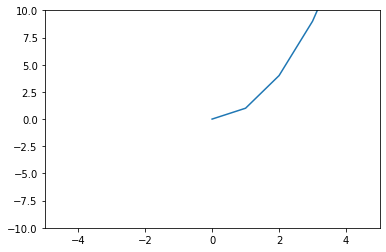

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display

fig, ax = plt.subplots()

ax.set(xlim=(-5, 5), ylim=(-10, 10))
x_data = []
y_data = []

line, = ax.plot([], [])

def update(frame : range):
    x_data.append(frame)
    y_data.append(frame ** 2)
    line.set_data(x_data, y_data)
    return line,

animation = FuncAnimation(fig, update, frames=range(10), blit=True)

display(HTML(animation.to_jshtml()))